In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sio
import helper_functions as hf
df = pd.read_csv('data/participant_info.csv', delimiter=';')
valid_recs = [
    'P001_S002_001', 'P001_S002_002', 'P002_S002_001', 'P002_S002_002', 
    'P003_S001_001', 'P003_S001_002', 'P003_S002_001', 'P003_S002_002', 
    'P004_S002_001', 'P004_S002_002', 'P005_S002_001', 'P005_S002_002', 
    'P007_S001_001', 'P007_S001_002', 'P007_S002_001', 'P007_S002_002', 
    'P008_S001_001', 'P008_S001_002', 'P008_S002_001', 'P008_S002_002', 
    'P009_S001_001', 'P009_S001_002', 'P009_S002_001', 'P009_S002_002', 
    'P010_S002_001', 'P010_S002_002', 'P011_S002_001', 'P011_S002_002', 
    'P012_S002_001', 'P012_S002_002', 'P013_S001_001', 'P013_S001_002', 
    'P013_S002_001', 'P014_S001_001', 'P014_S001_002', 'P014_S002_001', 
    'P014_S002_002', 'P015_S002_001', 'P015_S002_002', 'P016_S001_001', 
    'P016_S001_002', 'P016_S002_001', 'P016_S002_002', 'P017_S001_001', 
    'P017_S001_002', 'P017_S002_001', 'P017_S002_002', 'P018_S001_001', 
    'P018_S001_002', 'P018_S002_001', 'P018_S002_002', 'P019_S001_001', 
    'P019_S001_002', 'P019_S002_001', 'P019_S002_002', 'P020_S002_001', 
    'P020_S002_002', 'P021_S001_001', 'P021_S001_002', 'P021_S002_001', 
    'P021_S002_002', 'P023_S001_001', 'P023_S001_002', 'P023_S002_001', 
    'P023_S002_002', 'P024_S001_001', 'P024_S001_002', 'P024_S002_001', 
    'P024_S002_002', 'P025_S001_001', 'P025_S001_002', 'P025_S002_001', 
    'P025_S002_002', 'P026_S001_001', 'P026_S001_002', 'P026_S002_001', 
    'P026_S002_002', 'P027_S001_001', 'P027_S001_002', 'P027_S002_001', 
    'P027_S002_002', 'P028_S001_001','P028_S001_002']
valid_recs_eeg = [
    'P001_S001_001', 'P001_S001_002', 'P001_S002_001', 'P001_S002_002',
    'P002_S001_001', 'P002_S001_002', 'P002_S002_001', 'P002_S002_002',
    'P003_S001_001', 'P003_S001_002', 'P003_S002_001', 'P003_S002_002',
    'P004_S001_001', 'P004_S001_002', 'P004_S002_001', 'P004_S002_002',
    'P005_S001_001', 'P005_S001_002', 'P005_S002_001', 'P005_S002_002',
    'P006_S001_001', 'P006_S001_002', 'P007_S001_001', 'P007_S001_002',
    'P007_S002_001', 'P007_S002_002', 'P008_S001_001', 'P008_S001_002',
    'P008_S002_001', 'P008_S002_002', 'P009_S001_001', 'P009_S001_002',
    'P009_S002_001', 'P009_S002_002', 'P010_S001_001', 'P010_S001_002',
    'P010_S002_001', 'P010_S002_002', 'P011_S001_001', 'P011_S001_002',
    'P011_S002_001', 'P011_S002_002', 'P012_S001_001', 'P012_S001_002',
    'P012_S002_001', 'P012_S002_002', 'P013_S001_001', 'P013_S001_002',
    'P013_S002_001', 'P013_S002_002', 'P014_S001_001', 'P014_S001_002',
    'P014_S002_001', 'P014_S002_002', 'P015_S001_001', 'P015_S001_002',
    'P015_S002_001', 'P015_S002_002', 'P016_S001_001', 'P016_S001_002',
    'P016_S002_001', 'P016_S002_002', 'P017_S001_001', 'P017_S001_002',
    'P017_S002_001', 'P017_S002_002', 'P018_S001_001', 'P018_S001_002',
    'P018_S002_001', 'P018_S002_002', 'P019_S001_001', 'P019_S001_002',
    'P019_S002_001', 'P019_S002_002', 'P020_S001_001', 'P020_S001_002',
    'P020_S002_001', 'P020_S002_002', 'P021_S001_001', 'P021_S001_002',
    'P021_S002_001', 'P021_S002_002', 'P022_S001_001', 'P022_S001_002',
    'P022_S002_001', 'P022_S002_002', 'P023_S001_001', 'P023_S001_002',
    'P023_S002_001', 'P023_S002_002', 'P024_S001_001', 'P024_S001_002',
    'P024_S002_001', 'P024_S002_002', 'P025_S001_001', 'P025_S001_002',
    'P025_S002_001', 'P025_S002_002', 'P026_S001_001', 'P026_S001_002',
    'P026_S002_001', 'P026_S002_002', 'P027_S001_001', 'P027_S001_002',
    'P027_S002_001', 'P027_S002_002', 'P028_S001_001','P028_S001_002'
]

pss_scores = hf.load_mat_file('pss_score_1_10.mat', data=False)
stai_scores = hf.load_mat_file('stai_scores.mat', data=False)

stai_score_vals = list(e[0] for e in stai_scores.values())
print(np.percentile(stai_score_vals, q=33, axis=0))
print(np.percentile(stai_score_vals, q=66, axis=0))
print(len(stai_score_vals))
print(np.count_nonzero(np.array(stai_score_vals)>=48) + np.count_nonzero(np.array(stai_score_vals)<=33))

33.0
42.620000000000005
108
64


83
['P001_S002_001', 'P001_S002_002', 'P002_S002_001', 'P002_S002_002', 'P003_S001_001', 'P003_S001_002', 'P003_S002_001', 'P003_S002_002', 'P004_S002_001', 'P004_S002_002', 'P005_S002_001', 'P005_S002_002', 'P007_S001_001', 'P007_S001_002', 'P007_S002_001', 'P007_S002_002', 'P008_S001_001', 'P008_S001_002', 'P008_S002_001', 'P008_S002_002', 'P009_S001_001', 'P009_S001_002', 'P009_S002_001', 'P009_S002_002', 'P010_S002_001', 'P010_S002_002', 'P011_S002_001', 'P011_S002_002', 'P012_S002_001', 'P012_S002_002', 'P013_S001_001', 'P013_S001_002', 'P013_S002_001', 'P014_S001_001', 'P014_S001_002', 'P014_S002_001', 'P014_S002_002', 'P015_S002_001', 'P015_S002_002', 'P016_S001_001', 'P016_S001_002', 'P016_S002_001', 'P016_S002_002', 'P017_S001_001', 'P017_S001_002', 'P017_S002_001', 'P017_S002_002', 'P018_S001_001', 'P018_S001_002', 'P018_S002_001', 'P018_S002_002', 'P019_S001_001', 'P019_S001_002', 'P019_S002_001', 'P019_S002_002', 'P020_S002_001', 'P020_S002_002', 'P021_S001_001', 'P021_S001

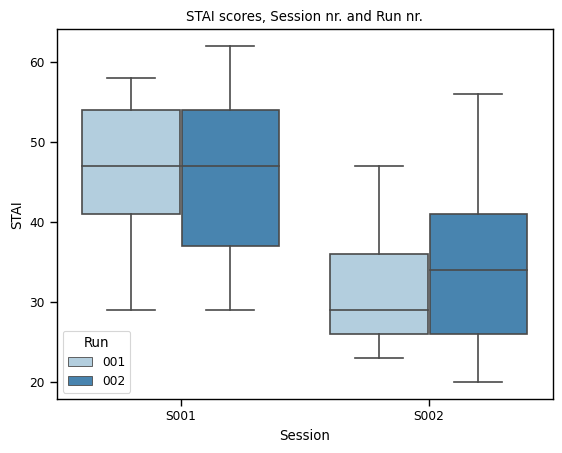

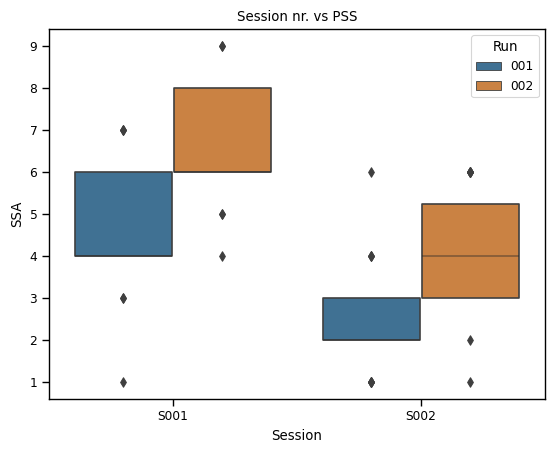

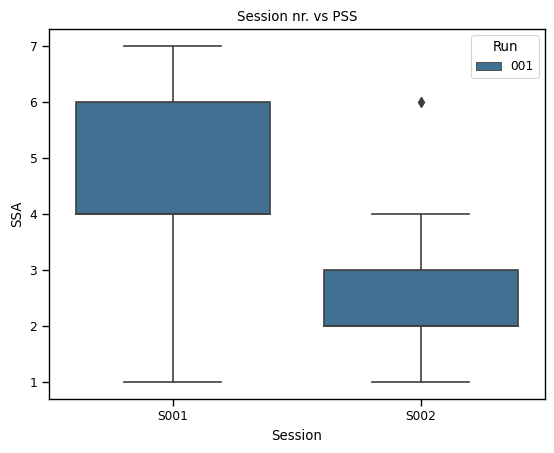

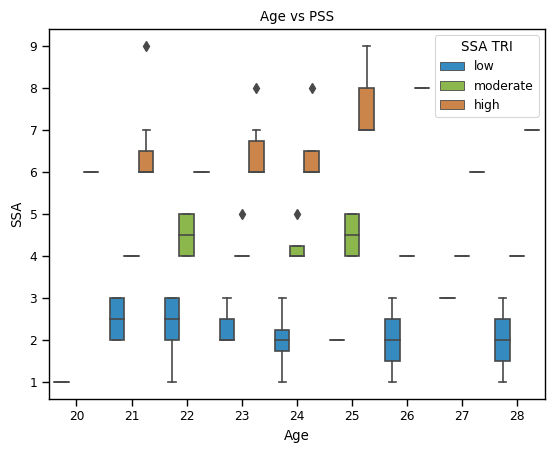

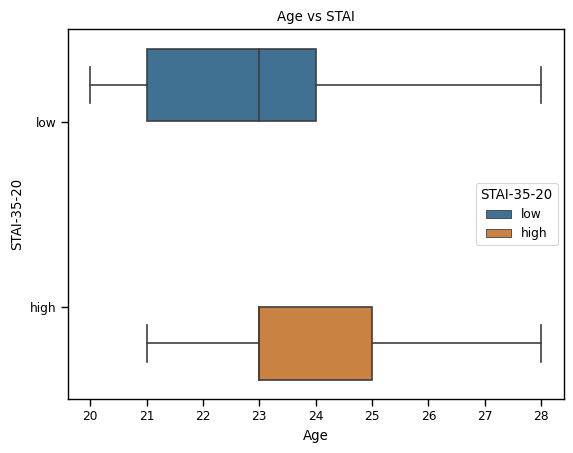

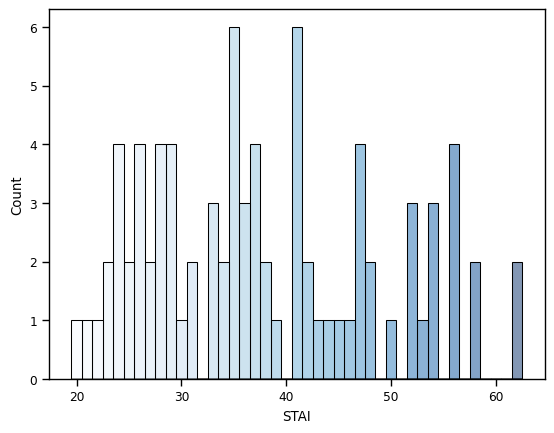

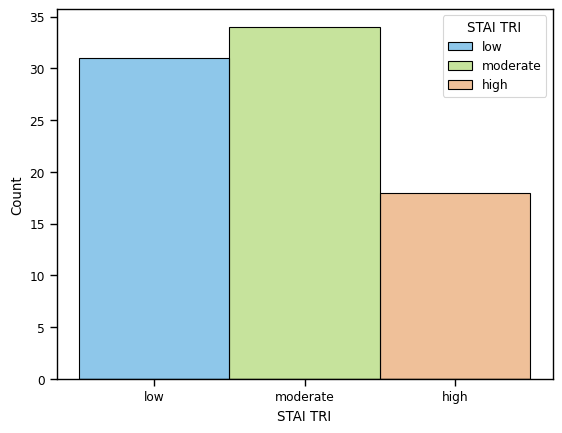

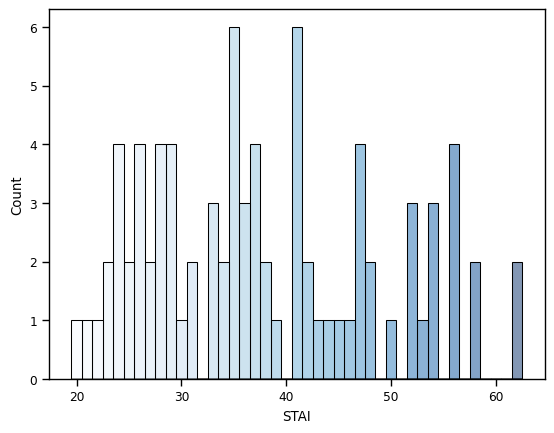

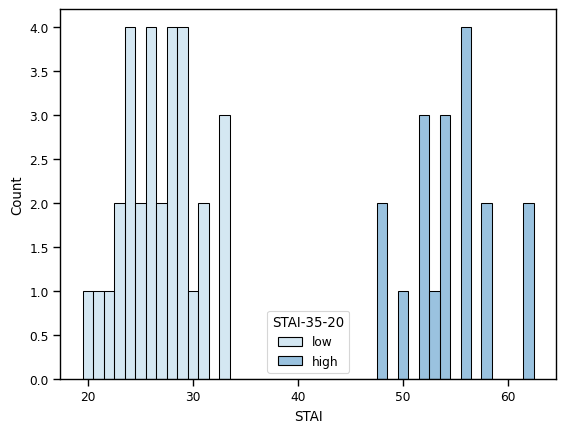

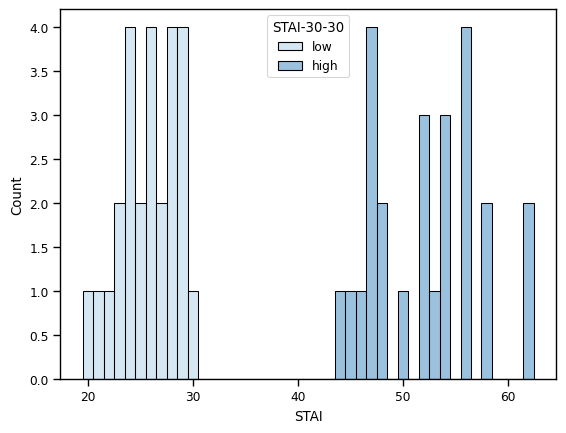

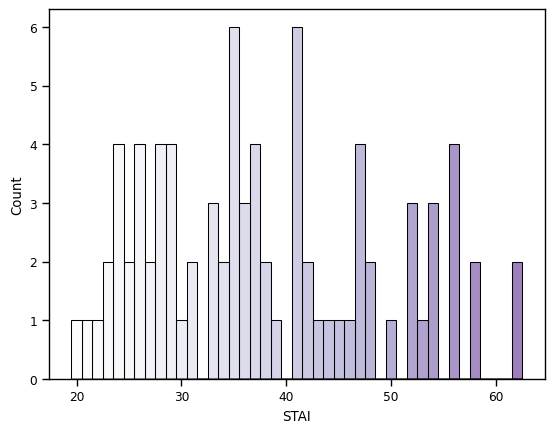

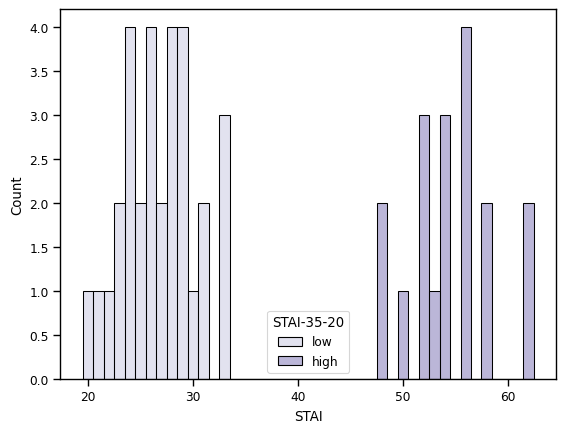

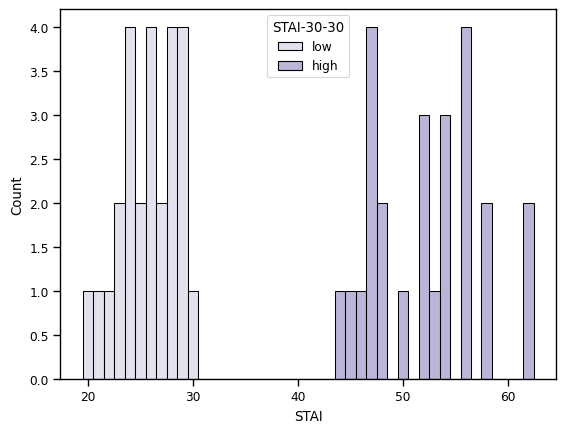

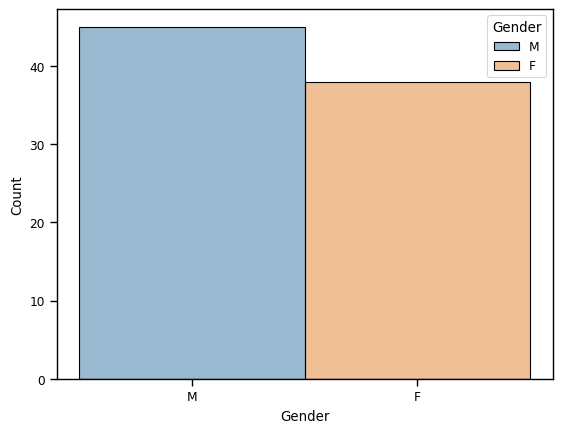

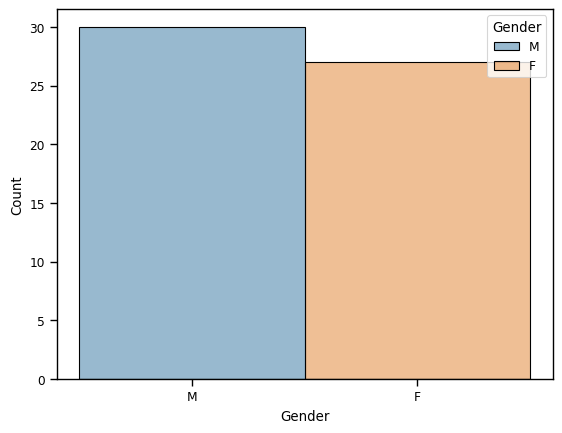

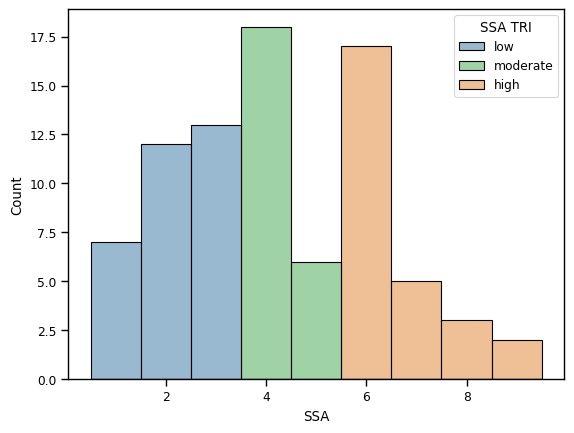

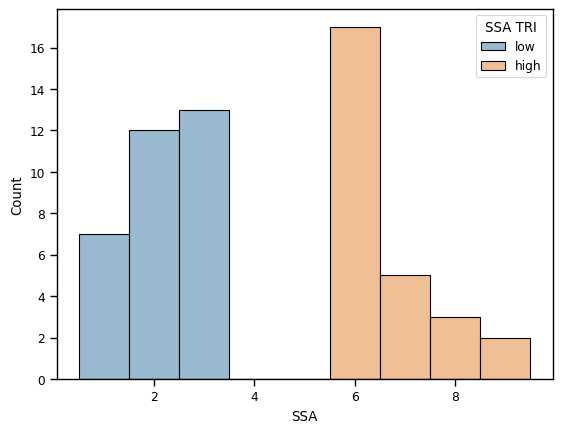

In [3]:
participants = [i.split('_')[0] for i in valid_recs]
df_new = pd.DataFrame(columns=['P', 'Session', 'Run', 'Age', 'PSS', 'STAI', 'Gender', 'STAI TRI', 'PSS TRI'])

print(len(valid_recs))
print(valid_recs)
for p, v, g in zip(df.P.values, df.Age.values, df.Gender.values):
    if p<10:
        p = 'P00'+str(p)
    else:
        p = 'P0'+str(p)
    for key in valid_recs:
        per, ses, run = key.split('_')
        if p == per:
            df_new = pd.concat([df_new, pd.DataFrame({'P': p,
                                                      'Session': ses, 
                                                      'Run': run, 
                                                      'Age': v, 
                                                      'SSA': pss_scores[key], 
                                                      'STAI': stai_scores[key], 
                                                      'Gender': g,
                                                      'STAI TRI' : 'high' if stai_scores[key] >= 48 else 'low' if stai_scores[key] <= 33 else 'moderate',
                                                      'STAI-35-20' : 'high' if stai_scores[key] >= 48 else 'low' if stai_scores[key] <= 33 else np.nan,
                                                      'STAI-30-30' : 'high' if stai_scores[key] >= 44 else 'low' if stai_scores[key] <= 30 else np.nan,
                                                      'SSA TRI' : 'high' if pss_scores[key] >= 6 else 'low' if pss_scores[key] < 4 else 'moderate'
                                                    }, 
                                                      index=[key])])

df_no_moderate_stai = df_new[df_new['STAI TRI'] != 'moderate']
df_35_20 = df_new[df_new['STAI-35-20'] != np.nan]
df_30_30 = df_new[df_new['STAI-30-30'] != np.nan]
df_no_moderate_pss = df_new[df_new['SSA TRI'] != 'moderate']
l = df_new[df_new['STAI TRI'] != 'moderate']
df_reduced = df_new[[a or b for a,b in zip(df_new['STAI'] >=43, df_new['STAI'] <= 33)]]
df_r1 = df_new[df_new['Run'] == '001']
print(df_new.head())
print(df_new.drop(df_new.columns[[7,8]], axis=1) )

p3 = ['#3274a1', '#41a64b', '#e1812c']
p2 = ['#3274a1', '#e1812c']
p2_gender = ['#577399', '#FE5F55'] 
p3_stress = ['#1E91D6', '#8FC93A', '#E18335']
p2_stress = ['#1E91D6', '#E18335']
p2_run = ['#F4F4F6', '#66666E']
sns.set_color_codes(
    'deep'
)
sns.set_context("paper")
sns.boxplot(data=df_new, x='Session', y='STAI', hue='Run', order=['S001', 'S002'], palette='Blues').set_title('STAI scores, Session nr. and Run nr.')
plt.show()

sns.boxenplot(data=df_new, x='Session', y='SSA', order=['S001', 'S002'], hue='Run', palette=p2).set_title('Session nr. vs PSS')
plt.show()
sns.boxplot(data=df_r1, x='Session', y='SSA', order=['S001', 'S002'], hue='Run', palette=p2).set_title('Session nr. vs PSS')
plt.show()


sns.boxplot(data=df_new, x='Age', y='SSA', hue='SSA TRI', hue_order=['low', 'moderate', 'high'],palette=p3_stress).set_title('Age vs PSS')
plt.show()

sns.boxplot(data=df_no_moderate_stai, x='Age', y='STAI-35-20', hue='STAI-35-20', hue_order=['low', 'high'], palette=p2).set_title('Age vs STAI')
plt.show()

sns.histplot(data=df_new, x='STAI', discrete=True, hue='STAI', legend=False, palette='Blues')#, hue_order=['low', 'moderate', 'high'], palette=p3_stress, stat='count')
plt.show()

sns.histplot(data=df_new, x='STAI TRI', discrete=True, hue='STAI TRI', hue_order=['low', 'moderate', 'high'], palette=p3_stress, stat='count')
plt.show()


sns.histplot(data=df_new, x='STAI', discrete=True, hue='STAI', legend=False, palette='Blues', stat='count')
plt.show()

sns.histplot(data=df_35_20, x='STAI', discrete=True, hue='STAI-35-20', hue_order=['low', 'high'], palette='Blues', stat='count')
plt.show()

sns.histplot(data=df_30_30, x='STAI', discrete=True, hue='STAI-30-30', hue_order=['low', 'high'], palette='Blues', stat='count')
plt.show()

sns.histplot(data=df_new, x='STAI', discrete=True, hue='STAI', legend=False, palette='Purples', stat='count')
plt.show()

sns.histplot(data=df_35_20, x='STAI', discrete=True, hue='STAI-35-20', hue_order=['low', 'high'], palette='Purples', stat='count')
plt.show()

sns.histplot(data=df_30_30, x='STAI', discrete=True, hue='STAI-30-30', hue_order=['low', 'high'], palette='Purples', stat='count')
plt.show()

ax = sns.histplot(data=df_new, x='Gender', discrete=True, hue='Gender', palette=p2, stat='count')
plt.show()

ax = sns.histplot(data=df_reduced, x='Gender', discrete=True, hue='Gender', palette=p2, stat='count')
plt.show()

sns.histplot(data=df_new, x='SSA', discrete=True, hue='SSA TRI', hue_order=['low', 'moderate', 'high'], palette=p3, stat='count')
plt.show()

sns.histplot(data=df_no_moderate_pss, x='SSA', discrete=True, hue='SSA TRI', hue_order=['low', 'high'], palette=p2, stat='count')
plt.show()



In [74]:
df_new

print(np.percentile(df_new['STAI'].values, q=30, axis=0))
print(np.percentile(df_new['STAI'].values, q=100-30, axis=0))
print(np.percentile(df_new['STAI'].values, q=35, axis=0))
print(np.percentile(df_new['STAI'].values, q=80, axis=0))
print(len(df_new['STAI'].values))
print(np.count_nonzero(np.array(df_new['STAI'].values)>=48) + np.count_nonzero(np.array(df_new['STAI'].values)<=33))
print(np.count_nonzero(np.array(df_new['STAI'].values)>=44) + np.count_nonzero(np.array(df_new['STAI'].values)<=30))

29.599999999999998
43.4
33.0
48.0
83
49
51


In [13]:
%matplotlib qt
sns.histplot(data=df_new, x='STAI', discrete=True, hue='STAI', legend=False, palette='Blues', stat='count')
plt.show()



In [26]:
sns.boxplot(data=df_new, x='Session', y='STAI', hue='Run', order=['S001', 'S002'], palette='Blues').set_title('STAI scores, Session nr. and Run nr.')
plt.show()

In [35]:
sns.boxplot(data=df_new, x='Session', y='STAI', hue='Gender', order=['S001', 'S002'], palette=p2).set_title('STAI scores, Session nr. and Gender')
plt.show()

In [70]:
sns.histplot(data=df_new, x='Age', discrete=True, legend=False, palette='Blues', stat='count')
plt.show()

In [52]:
sns.scatterplot(data=df_new, x='Age', y='STAI', hue='Gender', palette='RdBu_r').set_title('Age vs STAI')
plt.show()

In [74]:
sns.jointplot(data=df_new, x='Age', y='STAI', hue='Gender', palette='RdBu_r')
plt.show()

In [76]:
np.median(df_new['Age'].values)

23.0

In [12]:
sns.histplot(data=df_35_20, x='STAI', discrete=True, hue='STAI-35-20', hue_order=['low', 'high'], palette='Blues', stat='count')
plt.show()



In [11]:
sns.histplot(data=df_30_30, x='STAI', discrete=True, hue='STAI-30-30', hue_order=['low', 'high'], palette='Blues', stat='count')
plt.show()

In [24]:
sns.histplot(data=df_35_20, x='STAI-35-20', discrete=True, hue='STAI-35-20', hue_order=['low', 'high'], palette='Blues', stat='count', legend=False)
plt.show()


In [23]:
sns.histplot(data=df_30_30, x='STAI-30-30', discrete=True, hue='STAI-30-30', hue_order=['low', 'high'], palette='Blues', stat='count', legend=False)
plt.show()

In [43]:
genders = df_new.Gender.tolist()
p = df_new.P.tolist()
print(list(e[-1] for e in list(np.unique(list(str(pi)+str(gi) for pi,gi in zip(p, genders))))))

['M', 'M', 'F', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'F', 'M', 'M', 'F', 'F', 'F', 'F', 'F', 'F', 'M']


In [99]:
df2 = df_new[df_new['Run'] == '001']
print(df2[df2['STAI TRI'] != 'moderate'])

                  P Session  Run Age PSS  STAI Gender STAI trilabel  \
P001_S002_001  P001    S002  001  22   2  29.0      M           low   
P002_S002_001  P002    S002  001  22   2  26.0      M           low   
P003_S001_001  P003    S001  001  25   7  58.0      F          high   
P003_S002_001  P003    S002  001  25   2  36.0      F           low   
P004_S002_001  P004    S002  001  21   2  24.0      F           low   
P007_S001_001  P007    S001  001  21   7  56.0      M          high   
P007_S002_001  P007    S002  001  21   4  28.0      M           low   
P008_S001_001  P008    S001  001  24   4  46.0      M          high   
P008_S002_001  P008    S002  001  24   2  23.0      M           low   
P009_S002_001  P009    S002  001  21   3  27.0      M           low   
P010_S002_001  P010    S002  001  20   1  23.0      M           low   
P011_S002_001  P011    S002  001  22   3  31.0      M           low   
P012_S002_001  P012    S002  001  22   2  47.0      M          high   
P013_S

In [100]:
# SAVE LABEL DATAFRAMES
df_new.to_pickle('labels.pkl')
df_no_moderate_stai.to_pickle('labels_no_moderate_stai.pkl')

In [89]:
df_pristine = df_new.drop(df_new.columns[[7,8]], axis=1)
df_pristine.to_pickle('all_labels.pkl')